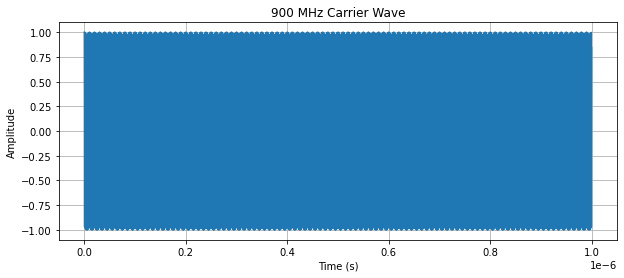

ValueError: operands could not be broadcast together with shapes (100000,) (10000,) 

In [1]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

## In the complex baseband equivalent representation, the carrier frequency is suppressed ##
#Let's include carrier

# Constants
frequency = 900e6  # 900 MHz carrier frequency in Hz
duration = 1e-6    # Duration of the signal in seconds (1 µs)
sampling_rate = 10e9  # Sampling rate in Hz (10 GS/s) ##sampling_rate needs to be significantly higher than the carrier frequency to accurately represent the signal.

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Carrier wave equation: A * cos(2 * pi * f * t)
Ac = 1 # Amplitude of carrier (Ac) is assumed to be 1 for simplicity
carrier = Ac*np.cos(2 * np.pi * frequency * t)

# Plotting the carrier wave
plt.figure(figsize=(10, 4))
plt.plot(t, carrier)
plt.title('900 MHz Carrier Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


#deltaf = 10
#K = np.array([1, 2, 3, 4])
#d_k = np.array(K-1,dtype=object)
#fc = 900*10**6 #900MHz
#h_k = fc + (d_k*deltaf)
#t = np.arange(0,1,1*10**-7) #0,1e-7,100
#c = Ac*np.cos(2*np.pi*fc*t)
signal = s*carrier

# Plotting the carrier wave
#plt.figure(figsize=(10, 4))
#plt.plot(t, c)
#plt.title('900 MHz Carrier Wave')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.grid(True)
#plt.show()

#plotting the bandpass signal
plt.plot(t, signal)
plt.title('Bandpass Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')
ax1.set_title('Constellation Diagram showing 2 bits')
ax1.grid(True);

In [ ]:
#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(signal)**2)/len(signal) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(signal.shape) # computed noise vector
    r = signal + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()

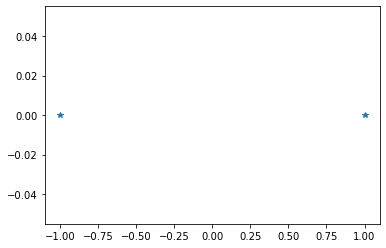

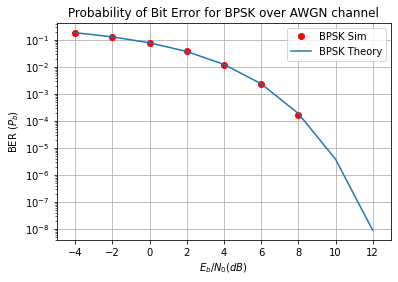

In [36]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()

In [10]:
def bpsk_mod(ak,L):
    from scipy.signal import upfirdn
    s_bb = upfirdn(h=[1]*L, x=2*ak-1, up = L) # NRZ encoder
    t=np.arange(start = 0,stop = len(ak)*L) #discrete time base
    return (s_bb,t)

def bpsk_demod(r_bb,L):
    x = np.real(r_bb) # I arm
    x = np.convolve(x,np.ones(L)) # integrate for Tb duration (L samples)
    x = x[L-1:-1:L] # I arm - sample at every L
    ak_hat = (x > 0).transpose() # threshold detector
    return ak_hat

from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    gamma = 10**(SNRdB/10) #SNR to linear scale
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    
    N0=P/gamma # Find the noise spectral density
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n # received signal
    return r

C:\Users\Zunayeed\AppData\Local\Temp\ipykernel_16320\121853122.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax1.legend();fig1.show();fig2.show()


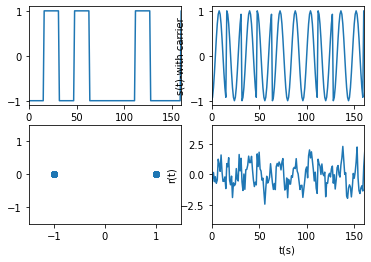

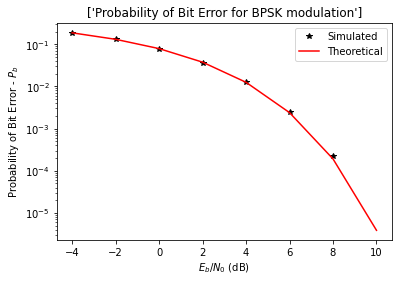

In [11]:
#Execute in Python3: exec(open("chapter_2/bpsk.py").read())
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
#from DigiCommPy.passband_modulations import bpsk_mod, bpsk_demod
#from DigiCommPy.channels import awgn
from scipy.special import erfc
N=100000 # Number of symbols to transmit
EbN0dB = np.arange(start=-4,stop = 11,step = 2) # Eb/N0 range in dB for simulation
L=16 # oversampling factor,L=Tb/Ts(Tb=bit period,Ts=sampling period)
# if a carrier is used, use L = Fs/Fc, where Fs >> 2xFc
Fc=800 # carrier frequency
Fs=L*Fc # sampling frequency
BER = np.zeros(len(EbN0dB)) # for BER values for each Eb/N0
ak = np.random.randint(2, size=N) # uniform random symbols from 0's and 1's
(s_bb,t)= bpsk_mod(ak,L) # BPSK modulation(waveform) - baseband
s = s_bb*np.cos(2*np.pi*Fc*t/Fs) # with carrier
# Waveforms at the transmitter
fig1, axs = plt.subplots(2, 2)
axs[0, 0].plot(t,s_bb) # baseband wfm zoomed to first 10 bits
axs[0, 0].set_xlabel('t(s)');axs[0, 1].set_ylabel(r'$s_{bb}(t)$-baseband')
axs[0, 1].plot(t,s) # transmitted wfm zoomed to first 10 bits
axs[0, 1].set_xlabel('t(s)');axs[0, 1].set_ylabel('s(t)-with carrier')
axs[0, 0].set_xlim(0,10*L);axs[0, 1].set_xlim(0,10*L)
#signal constellation at transmitter
axs[1, 0].plot(np.real(s_bb),np.imag(s_bb),'o')
axs[1, 0].set_xlim(-1.5,1.5);axs[1, 0].set_ylim(-1.5,1.5)
for i,EbN0 in enumerate(EbN0dB):
# Compute and add AWGN noise
    r = awgn(s,EbN0,L) # refer Chapter section 4.1
    r_bb = r*np.cos(2*np.pi*Fc*t/Fs) # recovered baseband signal
    ak_hat = bpsk_demod(r_bb,L) # baseband correlation demodulator
    BER[i] = np.sum(ak !=ak_hat)/N # Bit Error Rate Computation
# Received signal waveform zoomed to first 10 bits
axs[1, 1].plot(t,r) # received signal (with noise)
axs[1, 1].set_xlabel('t(s)');axs[1, 1].set_ylabel('r(t)')
axs[1, 1].set_xlim(0,10*L)
#------Theoretical Bit/Symbol Error Rates-------------
theoreticalBER = 0.5*erfc(np.sqrt(10**(EbN0dB/10))) # Theoretical bit error rate
#-------------Plots---------------------------
fig2, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.semilogy(EbN0dB,BER,'k*',label='Simulated') # simulated BER
ax1.semilogy(EbN0dB,theoreticalBER,'r-',label='Theoretical')
ax1.set_xlabel(r'$E_b/N_0$ (dB)')
ax1.set_ylabel(r'Probability of Bit Error - $P_b$')
ax1.set_title(['Probability of Bit Error for BPSK modulation'])
ax1.legend();fig1.show();fig2.show()


In [12]:
print(np.shape(s_bb))
print(np.shape(s))

(1600000,)
(1600000,)
